In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1 {color:#3636ff; font-family:Orbitron; text-shadow:5px 5px 5px #aaa;}
a {color:#3636ff;}
div.output_area pre, div.output_area html {font-size:100%; color:#3636ff;}     
</style>

## For creating posts

 # Let's try to image uniformly distributed sequences
Jupyter Notebook & SageMath Kernel

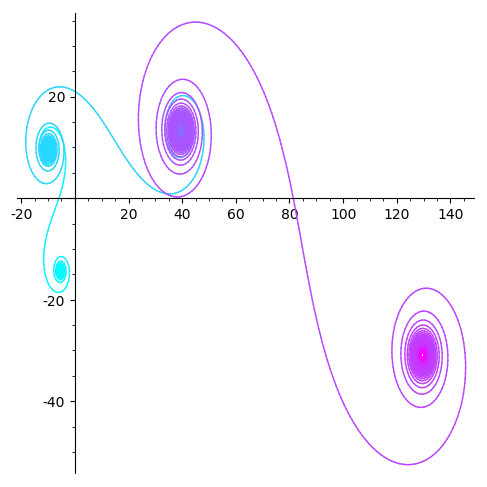

In [61]:
N = 10000; L = [CC(0,0)]; var('n'); 
c = [colormaps.cool((N^(-1)).n()*i)[:3] for i in [1..N]]
z = lambda n:exp(I*pi*n*ln(n/4)*2^0.5).n() 
for n in [1..N]: L.append(L[n-1]+CC(z(n))); 
sum([line([L[i],L[i+1]],color=c[i]) for i in [200..N-1]]).show(figsize=(5,5))

# If you want to improve this small and fun animation
Jupyter Notebook & SageMath Kernel

Animation with 25 frames
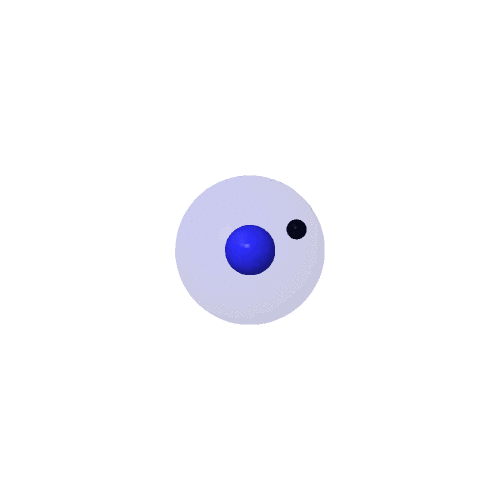

In [1]:
var('x,y,z'); from sage.plot.plot3d.shapes import Sphere
sphere12=Sphere(15,color='#3030ff',opacity=0.05).translate(0,0,0)+\
         Sphere(5,color='#3030ff').translate(0,0,0)
spheres=[sphere12+Sphere(2,color=(0.2*i,0,0.3*i))\
         .translate(0,13*cos(pi*i/12),7*sin(pi*i/12)) for i in [0..24]]
animate(spheres,frame=False)

# If you want to create a fun animation for functions
Jupyter Notebook & SageMath Kernel

Animation with 80 frames
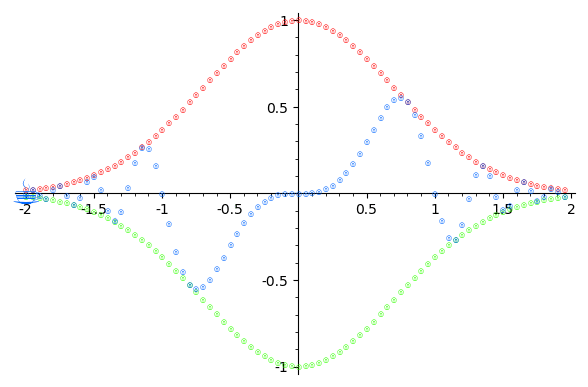

In [10]:
X=[x for x in srange(-2,2,0.05)]; Y=[exp(-x^2)*sin(pi*x^3) for x in X]; 
Y1,Y2=[exp(-x^2) for x in X],[-exp(-x^2) for x in X]
m,M='◎'.decode('utf-8'),'☕'.decode('utf-8'); c=[hue(0.3*i) for i in [0..2]]
t=sum([text(m,(x,y),fontsize=5,rgbcolor=c[i]) for i in [0..2] \
       for (x,y) in list(zip(X,[Y1,Y2,Y][i]))])
animate([t+text(M,(x,y),fontsize=25,rgbcolor=c[2]) for (x,y) in list(zip(X,Y))])

# When you want to imagine a "knot" curve
Jupyter Notebook & SageMath Kernel

In [26]:
@interact
def _(a=[10,15,20],b=[2,4,6],c=[15,10,5]):
    d=0.1; e=0.4; f=0.2; g=0.3; var('t')
    pretty_print('x = -%.1f*cos(%.1f*t)-%.1f*cos(%.1f*t)+%.1f*sin(%.1f*t))'%(a,d,b,e,c,f)) 
    pretty_print('y = -%.1f*cos(%.1f*t)+%.1f*sin(%.1f*t)-%.1f*sin(%.1f*t)'%(c,f,a,d,b,e))
    pretty_print('z = %.1f*cos(%.1f*t)'%(a,g))
    def L(i): return (-a*cos(d*i)-b*cos(e*i)+c*sin(f*i),-c*cos(f*i)+a*sin(d*i)-b*sin(e*i),a*cos(g*i))
    sum([line3d([L(i),L(i+1)],color=colormaps.winter(4*i)[:3],radius=.5) for i in [0..64]]).show(frame=False)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxODU0YWMwNTA+IHdpdGggMyB3aWRnZXRzCiAgYTogRHJvcGRvd24oZGVzY3JpcHRpb249dSdhJywgb3B0aW9ucz0oMTAsIDHigKY=


# Let's draw the sequence of complex numbers
Jupyter Notebook & SageMath Kernel

In [25]:
@interact
def _(N=(50,200,25)):
    L = [CC(0,0)]; var('n'); z = lambda n:exp(I*pi*n*2^0.3).n()
    c = [colormaps.hsv_r((200^(-1)).n()*i)[:3] for i in [1..200]]
    for n in [1..N]: L.append(L[n-1]+CC(z(n))); 
    sum([line([L[i],L[i+1]],color=c[i]) for i in [1..N-1]]).show(figsize=(5,5),axes=False)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxODU0YWM4YzA+IHdpdGggMSB3aWRnZXQKICBOOiBJbnRTbGlkZXIodmFsdWU9MTI1LCBkZXNjcmlwdGlvbj11J04nLCBtYXjigKY=


# If you want to imagine a stereo signal
Jupyter Notebook & SageMath Kernel

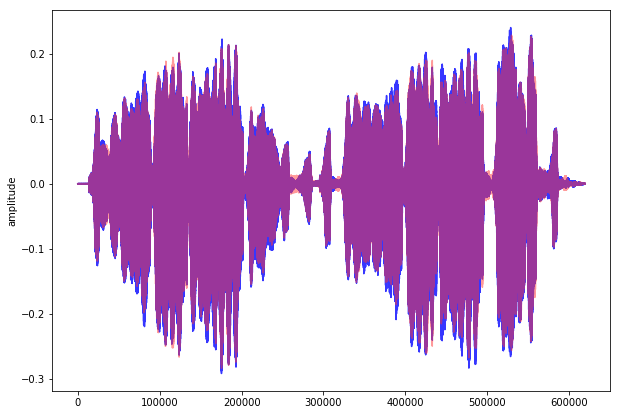

In [24]:
# https://ccrma.stanford.edu/~jos/wav/slideflute.wav
import numpy,pylab; from scipy.io import wavfile
fn = open('../OlgaBelitskaya/OlgaBelitskaya.github.io/slideflute.wav','r')
sr, wav = wavfile.read(fn); fn.close() 
wav = wav.astype('float')/numpy.iinfo(numpy.int16).max
f,ax = pylab.subplots(1,figsize=(10,7));
ax.plot(wav[:,1],c='#3636ff'); ax.plot(wav[:,0],c='#ff3636',alpha=0.5);
ax.set_ylabel('amplitude'); pylab.show()

In [ ]:
# online reading
import numpy,pylab; from scipy.io import wavfile; import urllib
input_file = urllib.urlopen('https://ccrma.stanford.edu/~jos/wav/slideflute.wav')
output_file = open('slideflute.wav','wb'); output_file.write(input_file.read())
output_file.close(); input_file.close()
sr, wav = wavfile.read('slideflute.wav');

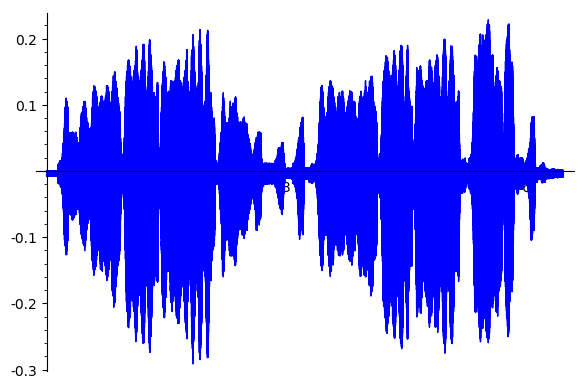

In [23]:
w=sage.media.wav.Wave('../OlgaBelitskaya/OlgaBelitskaya.github.io/slideflute.wav')
w.plot().show()
w.getframerate(), w.getnchannels()

# If you need to display the rectangle with the maximum area
Jupyter Notebook & SageMath Kernel

In [18]:
@interact
def _(t=slider(0.05,0.95,0.05,0.05)):
    def f(x): return -ln(x) 
    def g(x): return -ln(x)*x
    var('x'); x_max=solve((-ln(x)*x).diff(),x)[0].rhs()
    p=plot(f,(0,1),color='#3636ff',legend_label='y=-ln(x)')+\
    plot(g,(0,1),color='#ff36ff',legend_label='y*x=-ln(x)*x')
    pp=point((x_max,f(x_max)),color='#ff3636')+point((x_max,g(x_max)),color='#ff3636')
    a=plot(f(x_max),(0,x_max),fill='axis',color='#ff3636',fillcolor='#ff3636')
    an=text('-ln(x)*x='+str(g(x_max)),(x_max/2,f(x_max)+0.2),color='#ff3636')
    pt=point((t,f(t)),color='#3636ff')+point((t,g(t)),color='#ff36ff')
    at=plot(f(t),(0,t),fill='axis',color='#3636ff',fillcolor='#3636ff')
    ant=text('-ln(x)*x='+str(g(t).n()),(t+0.01,f(t)+0.2))
    (p+pp+a+an+pt+at+ant).show(figsize=(7,4))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxNzdiN2U4NDg+IHdpdGggMSB3aWRnZXQKICB0OiBUcmFuc2Zvcm1GbG9hdFNsaWRlcih2YWx1ZT0wLjA1LCBkZXNjcmlwdGnigKY=


# Let's explore the influence of the variable
Jupyter Notebook & SageMath Kernel

y == k^2*x^2 + k^2*x - 3*sqrt(3)*k*x + k^2 - 12*x^2 - sqrt(3)*k + 6*x - 6

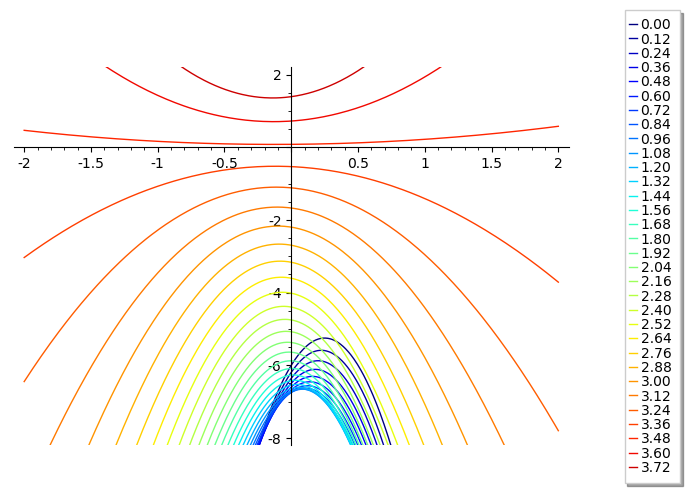

In [272]:
var('k,x,y'); pretty_print(y==x^2*k^2-12*x^2+k^2*x-3*sqrt(3)*k*x+6*x+k^2-sqrt(3)*k-6)
c=[colormaps.jet(0.03*i)[:3] for i in [0..31]]; k=[0.12*i for i in [0..31]]
p=sum([plot(x^2*k[i]^2-12*x^2+k[i]^2*x-3^1.5*k[i]*x+6*x+k[i]^2-3^0.5*k[i]-6,(x,-2,2),color=c[i],
            legend_label='%.2f'%k[i]) for i in [0..31]])
p.set_legend_options(loc=(1.1,-0.1)); p.show(ymin=-8,ymax=2,figsize=(7,5))

# If you want to explore tachyon projections
Jupyter Notebook & SageMath Kernel

In [17]:
@interact
def _(proj=['perspective','fisheye','perspective_dof']):
    k=1; e =[[[k,-k,k],[0,0,0]],[[0,0,0],[k,k,k]],[[k,k,k],[-k,k,k]],[[-k,k,k],[-k,-k,k]],
             [[-k,-k,k],[k,-k,k]],[[k,-k,k],[k,k,k]],[[k,k,k],[k,k,-k]],[[k,k,-k],[-k,k,-k]],
             [[-k,k,-k],[-k,-k,-k]],[[-k,-k,-k],[k,-k,-k]],[[k,-k,-k],[k,k,-k]],
             [[k,k,-k],[0,0,0]],[[0,0,0],[k,-k,-k]],[[k,-k,-k],[k,-k,k]]]
    if proj=='perspective_dof':
        t = Tachyon(xres=500,yres=500,camera_center=(-3.5,0.0,0.0),projection=proj,
                    antialiasing=3,raydepth=5,focallength='2.0',aperture='.003')
    else: t = Tachyon(xres=500,yres=500,camera_center=(-3.5,0.0,0.0),projection=proj)
    for i in [0..13]:
        t.texture('t%s'%str(i),opacity=0.3,color=colormaps.jet(0.077*i)[:3])
        t.fcylinder(e[i][0],e[i][1],.06,'t%s'%str(i)) 
    t.light((-5,-5,5),.1,(1,1,1)); t.show()

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxODMxZmVjZjg+IHdpdGggMSB3aWRnZXQKICBwcm9qOiBEcm9wZG93bihkZXNjcmlwdGlvbj11J3Byb2onLCBvcHRpb25zPSjigKY=


# If you need to explore the mirror optical effect
Jupyter Notebook & SageMath Kernel

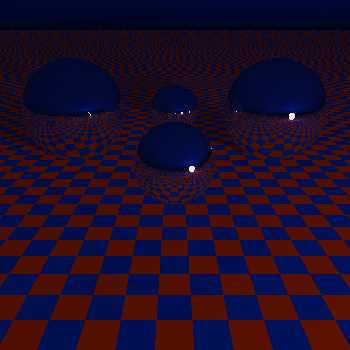

In [5]:
t = Tachyon(camera_center=(2,6,2.5),look_at=(2,0,0),raydepth=10)
t.texture('mirror',ambient=0.01,diffuse=0.01,specular=.9,opacity=0.9,color=(.3,.3,.3))
t.texture('t1',texfunc=1); t.texture('t2',color=(0,0.1,0.6),texfunc=2)
t.plane((0,0,0),(0,0,1),'t1'); t.plane((0,0,3),(0,0,4),'t2')
t.sphere((4,-1,1),1,'mirror'); t.sphere((0,-1,1),1,'mirror')
t.sphere((2,-1,1),0.5,'mirror'); t.sphere((2,2,1),0.5,'mirror')
t.light((7,7,1),1,(2,2,1)); show(t)

# A special view on parametric plots
Jupyter Notebook & SageMath Kernel

In [16]:
@interact
def _(a=[3,2,1],b=[3,2,1],c=[3,2,1]):
    pretty_print('x(t)=sin(%s*t)^2; y(t)=cos(%s*t)^3; z(t)=sin(%s*t)*ln(t+1)'\
                 %(str(a),str(b),str(c)))
    f = lambda p: (sin(a*p)^2,cos(b*p)^3,sin(c*p)*ln(p+1))
    t = Tachyon(xres=500,yres=500,camera_center=(-3,-6,2))
    t.texture('t1',color=(0,0,0.7),opacity=0.5); t.texture('t2',color=(0.9,0.9,0.9),texfunc=2)
    t.parametric_plot(f,0,6*pi,'t1',r=0.03); t.plane((5,5,-5),(0,-1,1),'t2')
    t.light((-8,-6,4),1,(1,1,1)); t.show()

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxODJmNmQ4NDg+IHdpdGggMyB3aWRnZXRzCiAgYTogRHJvcGRvd24oZGVzY3JpcHRpb249dSdhJywgb3B0aW9ucz0oMywgMizigKY=


# If you want to switch from the polar form to the parametric one
Jupyter Notebook & SageMath Kernel

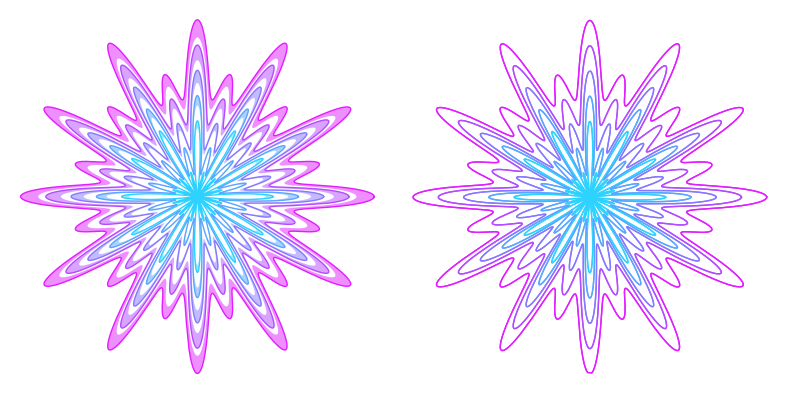

In [97]:
var('t'); f=cos(24*t)+cos(12*t) 
def cool(i): return colormaps.cool(45*i)[:3] 
p1=sum([polar_plot(f+i,(t,0,2*pi),color=cool(i),fill=0.9*(f+i),fillcolor=cool(i)) for i in [1..5]])
p2=sum([parametric_plot(((f+i)*cos(t),(f+i)*sin(t)),(t,0,2*pi),color=cool(i)) for i in [1..5]])
graphics_array([p1,p2]).show(axes=False,figsize=8)

# If you want to create art objects with math functions
Jupyter Notebook &#38; SageMath Kernel 

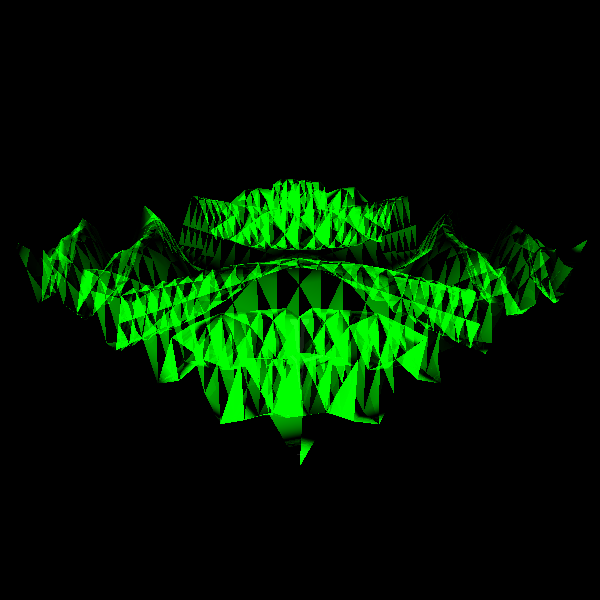

In [18]:
T=Tachyon(xres=600,yres=600,camera_center=(6,6,3),viewdir=(-5,-5,-3),raydepth=4)
T.light((6.2,6.2,3.2),0.3,(1,1,1))
def f(x,y): return float(sin(x*y)*cos(x*y))
def g(x,y): return (float(y*cos(x*y)^2-y*sin(x*y)^2),float(x*cos(x*y)^2-x*sin(x*y)^2),1)
T.texture('t',ambient=0.,diffuse=1,specular=.1,opacity=.1,color=Color('#00ff00'))
T.plot(f,(-3,3),(-3,3),'t',max_depth=5,initial_depth=3,grad_f=g); T.show()

# If you want to calculate the length of a curve over a given interval
Jupyter Notebook &#38; SageMath Kernel

In [15]:
import sympy; sympy.init_printing(use_unicode=True)
from sage.symbolic.integration.integral import indefinite_integral,definite_integral
@interact
def _(N=[1,2,3]):
    var('chi'); Y={1:ln(cos(2*chi))/2,2:exp(chi)+3,3:chi^2/4-0.5}
    X1={1:0,2:ln(8)/2,3:1}; X2={1:pi/12,2:ln(15)/2,3:2}
    L=definite_integral((1+diff(Y[N],chi)^2)^0.5,chi,X1[N],X2[N])
    pretty_print(html('<left><font>$\displaystyle{y = %s; \; FL = %s}$</font></left>'%\
                      (latex(Y[N]),latex(indefinite_integral((1+diff(Y[N],chi)^2)^0.5,chi)))))
    pretty_print(html('<left><font>$\displaystyle{L = %s = %s}$</font></left>'%(latex(L),str(L.n()))))
    M='☕'.decode('utf-8'); X=[x for x in srange(X1[N],X2[N],0.005)]; YN=[Y[N](chi=x) for x in X]
    sum([text(M,(x,y),fontsize=12,rgbcolor=Color('#3636ff')) for (x,y) in list(zip(X,YN))])\
    .show(gridlines=True,figsize=(7,5));
    x=sympy.Symbol('x'); y={1:ln(cos(2*x))/2,2:exp(x)+3,3:x^2/4-0.5}
    L=sympy.Integral(((1+diff(y[N],x)^2)^0.5).expand(),(x,X1[N],X2[N]))   
    print('\nL = '); display(L); print('= '+str(L.n()))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxN2ZlYTI0ODg+IHdpdGggMSB3aWRnZXQKICBOOiBEcm9wZG93bihkZXNjcmlwdGlvbj11J04nLCBvcHRpb25zPSgxLCAyLCDigKY=


## Additional material

In [3]:
%%r
data.frame(installed.packages()[,c(1,3)])

                      Package   Version
BH                         BH  1.69.0-1
Cairo                   Cairo    1.5-10
IRdisplay           IRdisplay     0.7.0
KernSmooth         KernSmooth   2.23-15
MASS                     MASS  7.3-51.4
Matrix                 Matrix    1.2-17
R6                         R6     2.4.0
RColorBrewer     RColorBrewer     1.1-2
RCurl                   RCurl 1.95-4.12
Rcpp                     Rcpp     1.0.2
VennDiagram       VennDiagram    1.6.20
XML                       XML 3.98-1.20
askpass               askpass       1.1
assertthat         assertthat     0.2.1
backports           backports     1.1.4
base                     base     3.6.0
base64enc           base64enc     0.1-3
bitops                 bitops     1.0-6
boot                     boot    1.3-22
class                   class    7.3-15
cli                       cli     1.1.0
cluster               cluster     2.0.8
codetools           codetools    0.2-16
colorspace         colorspace     1.4-1


In [2]:
#r.install_packages('leaflet')

In [4]:
#https://www.youtube.com/watch?v=zCiWUynbpJ4

In [5]:
#https://www.scikit-yb.org/en/latest/api/features/rankd.html

In [ ]:
import pylab; from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
train=fetch_20newsgroups(subset='train',shuffle=True,remove=('headers','footers','quotes'))
test=fetch_20newsgroups(subset='test',shuffle=True,remove=('headers','footers','quotes'))
y_train,y_test=train.target,test.target
vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,stop_words='english')
x_train=vectorizer.fit_transform(train.data); x_test=vectorizer.transform(test.data)
del train,test; print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
clf=MLPClassifier(hidden_layer_sizes=(128,),max_iter=3,solver='adam',verbose=1,random_state=1,learning_rate_init=.01)
clf.fit(x_train,y_train); clf.score(x_train,y_train),clf.score(x_test,y_test)
y_test_predictions=clf.predict(x_test)
pylab.figure(figsize=(12,5)); pylab.scatter(range(100),y_test[:100],s=100)
pylab.scatter(range(100),y_test_predictions[:100],s=25); pylab.show()

In [ ]:
<link
    href="https://cdn.pydata.org/bokeh/release/bokeh-0.12.13.min.css"
    rel="stylesheet" type="text/css">
<link
    href="https://cdn.pydata.org/bokeh/release/bokeh-widgets-0.12.13.min.css"
    rel="stylesheet" type="text/css">
<link
    href="https://cdn.pydata.org/bokeh/release/bokeh-tables-0.12.13.min.css"
    rel="stylesheet" type="text/css">

<script src="https://cdn.pydata.org/bokeh/release/bokeh-0.12.13.min.js"></script>
<script src="https://cdn.pydata.org/bokeh/release/bokeh-widgets-0.12.13.min.js"></script>
<script src="https://cdn.pydata.org/bokeh/release/bokeh-tables-0.12.13.min.js"></script>

In [ ]:
%%html
<script src="https://cdn.plot.ly/plotly-latest.min.js"/>
<div id="test_plotly" style="width:600px;height:600px;"/>
<script>
TEST1=document.getElementById('test_plotly');
var x1=Array(640).fill(0).map((r,t) => ((r+Math.cos(0.12*t))*Math.cos(0.01*t)));
var y1=Array(640).fill(0).map((r,t) => ((r+Math.cos(0.12*t))*Math.sin(0.01*t)));
var x2=Array(640).fill(1).map((r,t) => ((r+Math.cos(0.12*t))*Math.cos(0.01*t)));
var y2=Array(640).fill(1).map((r,t) => ((r+Math.cos(0.12*t))*Math.sin(0.01*t)));
Plotly.plot(TEST1,[{x:x1,y:y1,line:{color:'#3636ff'},name:'ϱ = cos 12θ'}]);
Plotly.plot(TEST1,[{x:x2,y:y2,line:{color:'#ff3636'},name:'ϱ = 1 + cos 12θ'}]);
</script>

In [ ]:
%%javascript
var s1='Variants for Highlighting:<br>AL,AD,AM,AT,BY,BE,BA,BG,CH,CY,CZ,DE,DK,EE,ES,FO,FI,FR,GB,GE,GI,GR,'
var s2='<br>HU,HR,IE,IS,IT,LT,LU,LV,MC,MK,MT,NO,NL,PL,PT,RO,RU,SE,SI,SK,SM,TR,UA,VA'; var s=s1.concat(s2);
Highcharts.mapChart('container', {
    chart:{map:'custom/europe',borderWidth:1,backgroundColor:'slategray'},
    title:{style:{'color':'#fff','fontSize':'18px'},text:'Explore Highcharts Parameters with Maps'},
    subtitle:{style:{'color':'#fff','fontSize':'14px'},text:s},legend:{enabled:false},
    series:[{name:'Country',color:'#1636ff',borderColor:'steelblue',borderWidth:1.5,
             data:[['fr',1],['gb',1],['es',1],['de',1],['it',1],['pl',1],['by',1]],
             dataLabels:{enabled:true,color:'#fff',
                         formatter:function (){if (this.point.value){return this.point.name;}}},
             tooltip:{headerFormat:'',pointFormat:'{point.name}'}}]
});

In [ ]:
%%html
<style>.xaxis1 text,.yaxis1 text {fill:#36ff36; font-size:150%;} .point {stroke:#fff; stroke-width:1;}             
.grid1 line,.grid1 path {stroke:#fff; stroke-opacity:0.9; shape-rendering:crispEdges;} </style>>
<script src="https://d3js.org/d3.v4.min.js"/><svg id="pp2" style="background-color:slategray;"/><script>
var n=630, m0=35, m={top:m0,right:m0,bottom:m0,left:m0}, w=500-m.left-m.right, h=500-m.top-m.bottom; 
var xScale = d3.scaleLinear().domain([-2.5,2.5]).range([0,w]); 
var yScale = d3.scaleLinear().domain([-2.5,2.5]).range([h,0]);
function make_x_gridlines() {return d3.axisBottom(xScale).ticks(11)}; 
function make_y_gridlines() {return d3.axisLeft(yScale).ticks(11)};
var pointColor = d3.scaleSequential().domain([0,n]).interpolator(d3.interpolateCool);
var data = d3.range(0,n).map(function(i){return {"x":(Math.cos(0.12*i)+1)*Math.cos(0.01*i),
                                                 "y":(Math.cos(0.12*i)+1)*Math.sin(0.01*i)}});                       
var svg = d3.select("#pp2").attr("width",w+m.left+m.right).attr("height",h+m.top+m.bottom)
            .append("g").attr("transform","translate("+m.left+","+m.top+")");
svg.append("g").attr("class","xaxis1").call(d3.axisBottom(xScale).tickSize(0.5))
               .attr("transform","translate(0,"+height+")"); 
svg.append("g").attr("class","yaxis1").call(d3.axisLeft(yScale).tickSize(0.5));    
svg.append("g").attr("class","grid1").attr("transform","translate(0,"+height+")")
               .call(make_x_gridlines().tickSize(-height).tickFormat(""));
svg.append("g").attr("class","grid1").call(make_y_gridlines().tickSize(-width).tickFormat(""));
svg.selectAll(".point").data(data).enter().append("circle").attr("class","point")
                       .attr("fill",function(d,i){return pointColor(i)})
                       .attr("r",4).attr("cx",function(d) {return xScale(d.x)})
                       .attr("cy",function(d) {return yScale(d.y)});
</script>

In [ ]:
%%html
<script src="https://cdn.plot.ly/plotly-latest.min.js"/>
<div id="test_plotly" style="width:900px;height:600px;"/>
<script>
TEST1=document.getElementById('test_plotly');
var x1=Array(80).fill(0.05).map((r,t) => (r*(t-40)));
var y1=Array(80).fill(0.05).map((r,t) => (Math.exp(-Math.pow(r*(t-40),2))));
var y2=Array(80).fill(0.05).map((r,t) => (-Math.exp(-Math.pow(r*(t-40),2))));
var y3=Array(80).fill(0.05).map((r,t) => (Math.sin(Math.PI*Math.pow(r*(t-40),3))*Math.exp(-Math.pow(r*(t-40),2))));
Plotly.plot(TEST1,[{x:x1,y:y1,line:{color:'#3636ff'},marker:{symbol:317},mode:'markers',
                    hoverinfo:'y',name:'$f(x) = e^{-x^2}$'}]);
Plotly.plot(TEST1,[{x:x1,y:y2,line:{color:'#36ff36'},marker:{symbol:218},mode:'markers',
                    hoverinfo:'y',name:'$f(x) = -e^{-x^2}$'}]);
Plotly.plot(TEST1,[{x:x1,y:y3,line:{color:'#ff3636'},mode:'text',text:'☕',
                    hoverinfo:'y',name:'$f(x) = sin(πx^3) e^{-x^2}$'}]);
</script>

In [13]:
@interact
def _(n=(1,11,1)):
    var('x'); f=[exp(-x^2)*sin(pi*x^n),exp(-x^2),-exp(-x^2)]
    sum([plot(f[i],(-2,2),color=hue(0.3*i),gridlines=True) for i in [0..2]]).show(figsize=(7,5))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxN2FiMjdiOTA+IHdpdGggMSB3aWRnZXQKICBuOiBJbnRTbGlkZXIodmFsdWU9NiwgZGVzY3JpcHRpb249dSduJywgbWF4PTHigKY=


In [8]:
# https://github.com/sagemath/sagecell/blob/master/static/sagecell.css
# https://github.com/sagemath/sagecell/blob/master/doc/embedding.rst

In [9]:
# http://doc.sagemath.org/pdf/en/reference/riemannian_geometry/riemannian_geometry.pdf

In [10]:
# https://developer.mozilla.org/en-US/docs/Web/JavaScript

In [11]:
# https://rnotebook.io/anon/4dc5e2a1b1e6d3ab/notebooks/Welcome.ipynb

In [12]:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b